In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
import os

In [2]:
df = pd.read_csv('../data/voice_data.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,label,emotions
0,-573.379150,34.064041,-33.337578,3.489916,-13.482152,-6.327230,-17.734171,-15.280939,-8.379515,-0.323866,...,-1.091130,-2.829661,-1.520689,-2.216941,-3.051777,1.104535,0.969608,2.822009,6,fearful
1,-545.244568,38.073475,-8.023163,7.236882,-13.688817,-2.157916,-12.315373,-7.948586,-14.858138,1.719064,...,-0.281293,0.684120,0.073632,2.641415,0.838373,1.800676,-0.601248,1.839665,5,angry
2,-690.535461,43.141396,-9.854416,10.819540,-14.295117,-2.288000,-10.151420,-4.941710,-6.615477,-2.972474,...,-1.439343,0.234170,0.237684,0.759627,0.519322,0.865444,1.468920,1.691772,8,surprise
3,-553.611633,41.233486,-9.912664,8.587062,-5.737630,-5.831647,-17.839375,-11.084945,-11.369494,3.470583,...,-0.685990,0.215328,-0.507966,0.684138,0.205525,0.921709,0.126503,0.312205,6,fearful
4,-576.153442,49.947994,-13.857949,8.248825,-12.159565,0.193613,-8.719680,-7.731156,-8.692744,0.833810,...,0.724145,1.723078,1.540662,1.585126,0.513308,0.538170,-0.266717,-1.757481,5,angry


In [3]:
df.drop(inplace=True, columns=["label"])
df.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,emotions
0,-573.379150,34.064041,-33.337578,3.489916,-13.482152,-6.327230,-17.734171,-15.280939,-8.379515,-0.323866,...,-0.138160,-1.091130,-2.829661,-1.520689,-2.216941,-3.051777,1.104535,0.969608,2.822009,fearful
1,-545.244568,38.073475,-8.023163,7.236882,-13.688817,-2.157916,-12.315373,-7.948586,-14.858138,1.719064,...,3.469327,-0.281293,0.684120,0.073632,2.641415,0.838373,1.800676,-0.601248,1.839665,angry
2,-690.535461,43.141396,-9.854416,10.819540,-14.295117,-2.288000,-10.151420,-4.941710,-6.615477,-2.972474,...,0.658183,-1.439343,0.234170,0.237684,0.759627,0.519322,0.865444,1.468920,1.691772,surprise
3,-553.611633,41.233486,-9.912664,8.587062,-5.737630,-5.831647,-17.839375,-11.084945,-11.369494,3.470583,...,0.015738,-0.685990,0.215328,-0.507966,0.684138,0.205525,0.921709,0.126503,0.312205,fearful
4,-576.153442,49.947994,-13.857949,8.248825,-12.159565,0.193613,-8.719680,-7.731156,-8.692744,0.833810,...,2.204446,0.724145,1.723078,1.540662,1.585126,0.513308,0.538170,-0.266717,-1.757481,angry


In [4]:
target = df["emotions"]


In [5]:
data = df.drop("emotions", axis=1)
feature_names = data.columns
data.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-573.379150,34.064041,-33.337578,3.489916,-13.482152,-6.327230,-17.734171,-15.280939,-8.379515,-0.323866,...,-4.505692,-0.138160,-1.091130,-2.829661,-1.520689,-2.216941,-3.051777,1.104535,0.969608,2.822009
1,-545.244568,38.073475,-8.023163,7.236882,-13.688817,-2.157916,-12.315373,-7.948586,-14.858138,1.719064,...,3.918904,3.469327,-0.281293,0.684120,0.073632,2.641415,0.838373,1.800676,-0.601248,1.839665
2,-690.535461,43.141396,-9.854416,10.819540,-14.295117,-2.288000,-10.151420,-4.941710,-6.615477,-2.972474,...,-1.102092,0.658183,-1.439343,0.234170,0.237684,0.759627,0.519322,0.865444,1.468920,1.691772
3,-553.611633,41.233486,-9.912664,8.587062,-5.737630,-5.831647,-17.839375,-11.084945,-11.369494,3.470583,...,0.062081,0.015738,-0.685990,0.215328,-0.507966,0.684138,0.205525,0.921709,0.126503,0.312205
4,-576.153442,49.947994,-13.857949,8.248825,-12.159565,0.193613,-8.719680,-7.731156,-8.692744,0.833810,...,0.995639,2.204446,0.724145,1.723078,1.540662,1.585126,0.513308,0.538170,-0.266717,-1.757481


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [12]:
from joblib import load

X_scaler = load('scaler.sav')


In [13]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.901
k: 3, Train/Test Score: 0.951/0.872
k: 5, Train/Test Score: 0.923/0.844
k: 7, Train/Test Score: 0.903/0.830
k: 9, Train/Test Score: 0.898/0.827
k: 11, Train/Test Score: 0.881/0.819
k: 13, Train/Test Score: 0.872/0.809
k: 15, Train/Test Score: 0.866/0.808
k: 17, Train/Test Score: 0.862/0.808
k: 19, Train/Test Score: 0.858/0.804
k: 21, Train/Test Score: 0.849/0.800
k: 23, Train/Test Score: 0.844/0.802
k: 25, Train/Test Score: 0.839/0.799
k: 27, Train/Test Score: 0.838/0.804
k: 29, Train/Test Score: 0.831/0.793


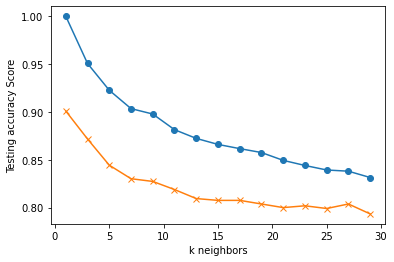

In [17]:
train_scores = []
test_scores = []
for k in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 30, 2), train_scores, marker='o')
plt.plot(range(1, 30, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [18]:
knn = KNeighborsClassifier(n_neighbors=27)
knn.fit(X_train_scaled, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=13 Test Acc: 0.804


In [19]:
from sklearn.metrics import classification_report
predictions = knn.predict(X_test_scaled)
print(classification_report(y_test, predictions,))

              precision    recall  f1-score   support

       angry       0.85      0.78      0.81       157
        calm       0.68      0.98      0.80       171
     disgust       0.86      0.80      0.83       143
     fearful       0.85      0.80      0.83       140
       happy       0.85      0.69      0.76       147
         sad       0.95      0.71      0.81       160
    surprise       0.73      0.87      0.79       142

    accuracy                           0.80      1060
   macro avg       0.82      0.80      0.80      1060
weighted avg       0.82      0.80      0.80      1060

